## Tier 1. Module 2: Mathematics for Computer Science
## Topic 6 - Integral calculus. Numerical integration
## Homework

### Description
You ordered an employee performance study and received an approximate dependence of performance (the number of tasks per unit of time) on the time of day, provided that the tasks are the same in complexity.

$$ 2 \left( \frac{4}{1.2\sqrt{2\pi}}e^{-\frac{1}{2} \left( \frac{x-11}{1.2} \right)^2} + \frac{7}{2.4\sqrt{2\pi}}e^{-\frac{1}{2} \left( \frac{x-15}{2.4} \right)^2} \right) $$

Let's denote the beginning and end of the working day as a=9 and b=18, respectively.

It is necessary to calculate the average number of tasks performed during the working day (during working hours from 9 to 18).

In [ ]:
def crazy_func(x):
    """
    Employee performance function

    :param x: np.linspace or sp.symbols, which means working hours
    :return: f(x) - function of tasks performed by an employee
    """
    import sympy as sp
    import numpy as np

    pac = sp
    if isinstance(x, np.ndarray):
        pac = np

    part1 = 4 / (1.2 * pac.sqrt(2 * pac.pi)) * pac.exp(-0.5 * ((x - 11) / 1.2) ** 2)
    part2 = 7 / (2.4 * pac.sqrt(2 * pac.pi)) * pac.exp(-0.5 * ((x - 15) / 2.4) ** 2)
    return 2 * (part1 + part2)

# working hours
a = 9
b = 18

### Task 1
Visualize the function on the interval from 0 to 24. Using SymPy, calculate the indefinite integral of the function and the integral from a to b.

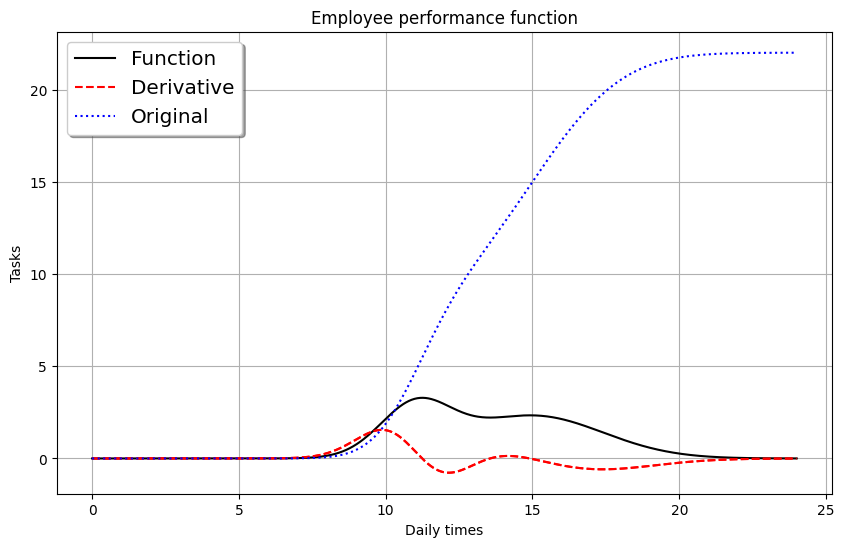

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

plt.figure(figsize=(10, 6))

# Function
X = np.linspace(0, 24, 1000)
Y = crazy_func(X)
plt.plot(X, Y, 'k-', label='Function')

# Derivative
Y1 = np.diff(Y) / np.diff(X)
plt.plot(X[:-1], Y1, 'r--', label='Derivative')
# Alternative method
Y1 = np.gradient(Y, X[1] - X[0])
plt.plot(X, Y1, 'r--')

# Original
Y_int=cumtrapz(Y, X, initial=0)
plt.plot(X,Y_int,'b:',label='Original')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')

plt.title("Employee performance function")
plt.xlabel("Daily times")
plt.ylabel("Tasks")
plt.grid()
plt.show()

In [ ]:
import sympy as sp

X = sp.symbols('x')
Y = crazy_func(X)

print("Indefinite integral:")
print(sp.integrate(Y, X))

print(f"\nDefinite integral from {a} to {b}:")
print(round(sp.integrate(Y, (X, a, b)), 13))

Indefinite integral:
4.94974746830583*sqrt(2)*erf(0.294627825494395*x - 4.41941738241592) + 2.82842712474619*sqrt(2)*erf(0.58925565098879*x - 6.48181216087669)

Definite integral from 9 to 18:
20.0516450141883


### Task 2
Write the function of numerical integration by the method of rectangles and calculate the integral from a to b.

Formula of rectangles\
$
\int_a^b f(x) \;dx \approx h \sum_{i=1}^{т} f \left( x_i - \frac{h}{2} \right)$

In [ ]:
def rectangle(f, a, b, n):
    """
    The function of numerical integration by the method of rectangles

    :param f: function to be integrated
    :param a: beginning of the integration interval
    :param b: end of the integration interval
    :param n: number of integration segments
    :return: calculated value of the defined integral
    """
    h = (b - a) / n   # interval value
    x = [a + h * i for i in range(n + 1)] # interval values of the argument
    result = h * sum([f(x[i+1] - h/2) for i in range(n)])
    return round(result, 13)

In [ ]:
rec = rectangle(crazy_func, a, b, 9)
rec

20.1177658908794

### Task 3
Write the numerical integration function using the trapezoidal method and calculate the integral from a to b.

Formula of trapezoids\
$
\int_a^b f(x) \;dx \approx h \left( \frac{f(a)+f(b)}{2} + \sum_{i=1}^{n-1} f \left( x_i \right) \right)
$

In [ ]:
def trapeze(f, a, b, n):
    """
    The function of numerical integration by the trapezoidal method

    :param f: function to be integrated
    :param a: beginning of the integration interval
    :param b: end of the integration interval
    :param n: number of integration segments
    :return: calculated value of the defined integral
    """
    h = (b - a) / n   # interval value
    x = [a + h * i for i in range(n + 1)] # interval values of the argument
    result = h * ((f(a) + f(b)) / 2 + sum([f(x[i+1]) for i in range(n - 1)]))
    return round(result, 13)

In [ ]:
trap = trapeze(crazy_func, a, b, 9)
trap

19.9195500437651

### Task 4
Write a numerical integration function using the Simpson method and calculate the integral from a to b.

Simpson's formula "1/3"\
$\int_a^b f(x) \;dx \approx \frac{1}{3}h \left[ f(x_0) + 4\sum_{i=1}^{n/2}f(x_{2i-1}) + 2\sum_{i=1}^{n/2-1}f(x_{2i}) + f(x_n) \right]$

Simpson's "3/8" formula for numbers divisible by 3\
$\int_a^b f(x) \;dx \approx \frac{3}{8}h \left[ f(x_0) + 3\sum_{i=1, 3i}^{n-1}f(x_i) + 2\sum_{i=1}^{n/3-1}f(x_{3i}) + f(x_n) \right]$

In [ ]:
def simpson(f, a, b, n):
    """
    The function of numerical integration by the Simpson method

    :param f: function to be integrated
    :param a: beginning of the integration interval
    :param b: end of the integration interval
    :param n: number of integration segments
    :return: calculated value of the defined integral
    """
    import numpy as np

    h = (b - a) / n               # interval value
    X = np.linspace(a, b, n + 1)  # interval values of the argument
    Y = f(X)                      # interval values of the function
    if n == 2:                    # Simpson's 1/3 rule for two intervals
        result = (b - a) / 6 * (Y[0] + Y[-1] + 4 * Y[1])
    elif n % 3 == 0 and n > 4:    # Simpson's 3/8 rule
        result = h * 3 / 8 * (Y[0] + Y[-1] + 3 * (sum(Y[1:-1:3]) + sum(Y[2:-1:3])) + 2 * sum(Y[3:-1:3]))
    else:                         # Simpson's 1/3 rule
        result = h / 3 * (Y[0] + Y[-1] + 4 * sum(Y[1:-1:2]) + 2 * sum(Y[2:-1:2]))
    return round(result, 13)

In [ ]:
sim = simpson(crazy_func, a, b, 9)
sim

20.0853368408924

### Task 5
Calculate the integral from a to b using the function scipy.integrate.quad.

In [ ]:
import scipy.integrate as spi

integral, error = spi.quad(crazy_func, a, b)

print(f"Definite integral from {a} to {b}:")
print(round(integral, 13))
print("\nEstimated error:")
print(error)

Definite integral from 9 to 18:
20.0516450141883

Estimated error:
1.2672390114804206e-11


### Conclusion

In [ ]:
error = (integral - sim) / integral * 100
error

-0.168025250198992

In [ ]:
error = (integral - trap) / integral * 100
error

0.658773733176144

In [ ]:
error = (integral - rec) / integral * 100
error

-0.329752878850184

Of all the methods of approximate calculation of definite integrals, Simpson's method turned out to be the most accurate, the error of calculated values obtained using SciPy and SymPy was 0.168%.